# Import data

In [ ]:
!gdown --id 1LHo-ICoeKAOBotSv2gbWF0K7fAbrQQxq
!gdown --id 15k6YNv4MxGt8N7LelCLfGx7xKSPPuhzD

Downloading...
From: https://drive.google.com/uc?id=1LHo-ICoeKAOBotSv2gbWF0K7fAbrQQxq
To: /content/test_without_label.pkl
100% 1.15M/1.15M [00:00<00:00, 72.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=15k6YNv4MxGt8N7LelCLfGx7xKSPPuhzD
To: /content/train_with_label.pkl
3.18MB [00:00, 49.8MB/s]


In [ ]:
!pip install pythainlp
!pip install fasttext

     |████████████████████████████████| 10.6MB 4.6MB/s 
     |████████████████████████████████| 747kB 43.5MB/s 
     |████████████████████████████████| 71kB 3.5MB/s 
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3094314 sha256=4f317eb2c355f26126f7fa08e0b6fff2957573dacd384340b91b5d327a069ec0
  Stored in directory: /root/.cache/pip/wheels/98/ba/7f/b154944a1cf5a8cee91c154b75231136cc3a3321ab0e30f592
Successfully built fasttext


In [ ]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import operator

from pythainlp.spell import NorvigSpellChecker
import fasttext
from sklearn.neighbors import NearestNeighbors

In [ ]:
x_train = pickle.load(open("train_with_label.pkl", "rb"))
x_test = pickle.load(open("test_without_label.pkl", "rb"))

In [ ]:
message = []
pos = []
correct = []
incorrect = []
corrected = []
label = []
train = []
for msg, tag in x_train:
    message.append(msg)
    pos.append(tag[0][0])
    incorrect.append(msg[tag[0][0][0]:tag[0][0][1]])
    correct.append(tag[0][1])
    label.append(tag[0][2])
    crd = msg[:tag[0][0][0]]+tag[0][1]+msg[tag[0][0][1]:]
    corrected.append(crd)
    train.append([msg, tag[0][0], msg[tag[0][0][0]:tag[0][0][1]], tag[0][1], crd, tag[0][2]])

print("MSG---")
print(message[:10])
print("POS---")
print(pos[:10])
print("WORD--")
print(correct[:10])
print("LABEL-")
print(label[:10])
print("INCORRECT")
print(incorrect[:10])
print("CORRECTED")
print(corrected[:10])

MSG---
[['หริอ', 'มี', 'ปัญหา', 'อะไร', 'ช่วย', 'ตอบ', 'ด้วย', 'ครับ'], ['อยาก', 'สมัคร', ' ', 'sms', ' ', 'เงิน', 'เข้า', 'เงิน', 'ออก', 'ทาง', 'เน็ต', 'ต้อง', 'ทำ', 'ยังงัย'], ['ไม่', 'ทราบ', 'ว่า', 'คุณ', ' ', 'พัชชาา', ' ', 'ไม่', 'สน', 'โลก', ' ', 'เปลี่ยน', 'เฉพาะ', 'เครื่อง', ' ', 'หรือ', 'เปลี่ยน', 'ทั้ง', 'เครื่อง', 'และ', 'เบอร์', 'คะ'], ['ทำ', 'รายการ', 'ที่', 'ตู้', 'atm', ' ', 'อะ', 'คะ', ' ', 'เป็น', 'การ', 'ทำ', 'รายการ', 'เปลี่ยน', 'เบอ', 'โทรสับ', 'อะ', 'คะ'], ['ย่า', 'ยัง', 'ดี', 'ที่', 'สิริ', 'ตอบ', 'แบบ', 'นั้น', ' ', 'ดู', 'ของ', 'เค้า', 'ดิ'], ['จขกท', '.', ' ', '3', '3', '3', '3', '3', '3', '3', ' ', 'เจ้าของ', 'เม้นท์', 'นี้', ' ', '9', '9', '9', '9', '9', '9', ' ', ' ', 'บุพเพสันนิวาสรึเปล่า', 'เนี่ย'], ['ละ', 'เวลา', 'เชค', 'ยอด', 'เงิน', 'ใน', 'บัญชี', 'ด้วย', 'คะ'], ['เล็ก', 'ๆ', 'ไม่', 'ใหญ่', 'ๆ', 'นาง', 'ทำ', 'ได้', ' ', ' ', 'น้องพี', 'สู้', 'ๆ', ' ', 'หลบ', 'ไป', 'นอน', 'หน่อย', 'เถอะ', 'นะ', ' ', 'เด๋ว', 'ตาคล้ำไม่สวยนาจา', '.', '.', '.'], ['ยอดพย', '

In [ ]:
train = pd.DataFrame(train, columns=["Message", "Position", "Incorrect", "Correct", "Corrected", "Label"])
train

,Message,Position,Incorrect,Correct,Corrected,Label
0,"[หริอ, มี, ปัญหา, อะไร, ช่วย, ตอบ, ด้วย, ครับ]","[0, 1]",[หริอ],[หรือ],"[หรือ, มี, ปัญหา, อะไร, ช่วย, ตอบ, ด้วย, ครับ]",misspelled
1,"[อยาก, สมัคร, , sms, , เงิน, เข้า, เงิน, ออก...","[13, 14]",[ยังงัย],[ยังไง],"[อยาก, สมัคร, , sms, , เงิน, เข้า, เงิน, ออก...",morphed
2,"[ไม่, ทราบ, ว่า, คุณ, , พัชชาา, , ไม่, สน, โ...","[5, 6]",[พัชชาา],[พัชชา],"[ไม่, ทราบ, ว่า, คุณ, , พัชชา, , ไม่, สน, โล...",misspelled
3,"[ทำ, รายการ, ที่, ตู้, atm, , อะ, คะ, , เป็น...","[7, 8]",[คะ],[ค่ะ],"[ทำ, รายการ, ที่, ตู้, atm, , อะ, ค่ะ, , เป็...",misspelled
4,"[ย่า, ยัง, ดี, ที่, สิริ, ตอบ, แบบ, นั้น, , ด...","[11, 13]","[เค้า, ดิ]","[เขา, สิ]","[ย่า, ยัง, ดี, ที่, สิริ, ตอบ, แบบ, นั้น, , ด...",morphed
...,...,...,...,...,...,...
9995,"[ของ, การ, ชำระ, ค่า, งวด, รถ, อ่ะ, คะ]","[6, 8]","[อ่ะ, คะ]","[อะ, ค่ะ]","[ของ, การ, ชำระ, ค่า, งวด, รถ, อะ, ค่ะ]",misspelled
9996,"[ทำ, ที่, ตู้, ได้, ปะ]","[4, 5]",[ปะ],[เปล่า],"[ทำ, ที่, ตู้, ได้, เปล่า]",morphed
9997,"[สมัค, กัน]","[0, 1]",[สมัค],[สมัคร],"[สมัคร, กัน]",misspelled
9998,"[งง, มาก, ค้ะ, , คุย, อะไร, กัน, ]","[2, 3]",[ค้ะ],[ค่ะ],"[งง, มาก, ค่ะ, , คุย, อะไร, กัน, ]",misspelled


# Data visualization

In [ ]:
train.describe()

,Message,Position,Incorrect,Correct,Corrected,Label
count,10000,10000,10000,10000,10000,10000
unique,9916,119,1360,1000,9669,7
top,[ค่าาา],"[0, 1]",[อ่ะ],[อะ],"[ใช่, ค่ะ]",misspelled
freq,3,1162,735,760,14,7054


In [ ]:
train.Label.unique()

array(['misspelled', 'morphed', 'abbreviation', 'ws', 'other',
       'spoonerism', 'new'], dtype=object)

In [ ]:
train.Label.value_counts()

misspelled      7054
morphed         2468
abbreviation     338
other             69
ws                61
spoonerism         7
new                3
Name: Label, dtype: int64

In [ ]:
correct_count = np.array(train.Correct.value_counts())
print(correct_count.mean())
print(correct_count.std())

10.0
48.73202232618712


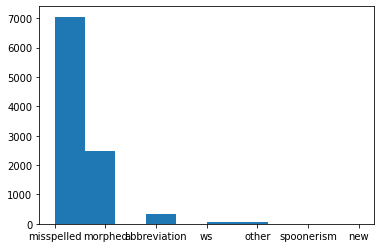

In [ ]:
plt.hist(train.Label)
plt.show()

# Helper function

## CER Checker

In [ ]:
def evaluate(pred, true):
    """
    Call cer() on every pair of sentences.
    Arguments:
    - pred: list of corrected sentence 
    - true: list of ground truth sentence 

    Returns:
    - average cer score as float
    """
    sum = 0
    for i in range(len(pred)):
        sum += cer(pred[i], true[i])
    return sum/len(pred)

In [ ]:
def cer(pred, true):
    """
    Calculation of CER with Levenshtein distance.
    Arguments:
    - pred: corrected sentence(list of characters)
    - true: ground truth sentence(list of characters)

    Returns:
    - cer score as Integer
    """
    # init
    d = np.zeros(((len(true)),(len(pred))), dtype=np.uint8)
    
    # computation
    for i in range(len(true)):
        for j in range(len(pred)):
            if true[i-1] == pred[j-1]:
                d[i][j] = d[i-1][j-1]
            else:
                substitution = d[i-1][j-1] + 1
                insertion    = d[i][j-1] + 1
                deletion     = d[i-1][j] + 1
                d[i][j] = min(substitution, insertion, deletion)
    return d[len(true)-1][len(pred)-1]/len(true)

In [ ]:
cer("ขนอ", "ขนาน")

0.5

## Create submission

In [ ]:
def wordCheck(i, map, message, count):
    """
        Argument: 
            i = position of word in message
            message = list of word
        Return:
            list of resulted word
    """
    word = message[i:i+count]
    # print(word)
    if tuple(word) in map:
        # print("check:", count)
        return True, map[tuple(word)]
    else:
        return False, list(word[0:1])

In [ ]:
def calculateResult(wordCheckFunc, count, map, data):
    result = []
    for message in data:
        newMessage = []
        i = 0
        while i < len(message):
            check, out = wordCheckFunc(i, map, message, count)
            newMessage += out
            if check:
                i += count
            else:
                i += 1
        result.append(newMessage)
    return result

In [ ]:
def writeSubmission(result, path="submission.txt"):
    submission = ["".join(sentence) for sentence in result]
    f = open(path, "wb")
    [f.write((i+"\n").encode()) for i in submission]

# Rule-based 

In [ ]:
def getMap(row, oneMap, twoMap, threeMap):
    ic = tuple(row.Incorrect)
    c = row.Correct
    if len(ic) == 1:
        getNMap(ic, c, oneMap)
    elif len(ic) == 2:
        getNMap(ic, c, twoMap)
    elif len(ic) == 3:
        getNMap(ic, c, threeMap)

def getNMap(incorrect, correct, map):
    if incorrect not in map:
        map[incorrect] = [[correct, 1]]
    else:
        for correctCount in map[incorrect]:
            if correctCount[0] == correct:
                correctCount[1] += 1
                break
            else:
                map[incorrect].append([correct, 1])

def getMaxMap(map, minThresh):
    max_map = {}
    for key, value in map.items():
        current = minThresh
        for v in value:
            if v[1] > current:
                max_map[key] = v[0]
                current = v[1]
    return max_map

def removeBadKeys(listOfBad, map):
    for key in listOfBad:
        k = tuple([key])
        map.pop(k, "print(k)")

In [ ]:
for i in range(20):
    oneMax = getMaxMap(oneMap, i)
    twoMax = getMaxMap(twoMap, i)
    threeMax = getMaxMap(threeMap, i)
    print(i, len(oneMax), len(twoMax), len(threeMax))

0 439 697 194
1 265 192 23
2 206 108 10
3 182 72 6
4 163 54 3
5 155 43 3
6 144 33 2
7 132 28 2
8 119 21 2
9 113 18 1
10 104 14 1
11 99 12 0
12 93 10 0
13 89 10 0
14 86 9 0
15 81 9 0
16 79 8 0
17 75 8 0
18 74 8 0
19 70 8 0


In [ ]:
%%time
oneMap = dict()
twoMap = dict()
threeMap = dict()
train.apply(lambda row: getMap(row, oneMap, twoMap, threeMap), axis=1)

badKeys = ["เขา", "อะ", "อยู่", "ค่ะ", "คะ","ใช่", "ใช้", "ไม่", "ไหม"]
removeBadKeys(badKeys, oneMap)

all_map = dict()
min_score = 100
min_map = ()

groundTruth = list(train.Corrected)
trainData = list(train.Message)
for threeThresh in range(5):
    for twoThresh in range(5):
        for oneThresh in [0, 1, 2, 3, 4, 6, 8, 10, 12, 14, 16, 18, 20]:
            oneMax = getMaxMap(oneMap, oneThresh)
            twoMax = getMaxMap(twoMap, twoThresh)
            threeMax = getMaxMap(threeMap, threeThresh)

            result = calculateResult(wordCheck, 3, threeMax, trainData)
            result = calculateResult(wordCheck, 2, twoMax, result)
            result = calculateResult(wordCheck, 1, oneMax, result)

            cer_score = evaluate(result, groundTruth)

            # all_map[(threeThresh, twoThresh, oneThresh)] = (cer_score, threeMax, twoMax, oneMax)
            if cer_score < min_score:
                min_map = (threeMax, twoMax, oneMax)
                min_score = cer_score
            
            print("{}, {}, {}, Score: {}".format(threeThresh, twoThresh, oneThresh, cer_score))

0, 0, 0, Score: 0.17489818201508564
0, 0, 1, Score: 0.13363830166180923
0, 0, 2, Score: 0.10926905245478642
0, 0, 3, Score: 0.10599653975965657
0, 0, 4, Score: 0.10312362738264451
0, 0, 6, Score: 0.10141614515160732
0, 0, 8, Score: 0.10292581853122854
0, 0, 10, Score: 0.10455115080039082
0, 0, 12, Score: 0.10443159226044067
0, 0, 14, Score: 0.09317188026958183
0, 0, 16, Score: 0.09355214540258502
0, 0, 18, Score: 0.09392108810776909
0, 0, 20, Score: 0.09568071622032083
0, 1, 0, Score: 0.17982744463504416
0, 1, 1, Score: 0.1390043569749869
0, 1, 2, Score: 0.1129777725932923
0, 1, 3, Score: 0.10848840300727161
0, 1, 4, Score: 0.10596951896303781
0, 1, 6, Score: 0.10457273210546775
0, 1, 8, Score: 0.10307841697873693
0, 1, 10, Score: 0.10496220846841718
0, 1, 12, Score: 0.10523233962041756
0, 1, 14, Score: 0.0943690263745761
0, 1, 16, Score: 0.09502923559127338
0, 1, 18, Score: 0.09573134929212837
0, 1, 20, Score: 0.09800496581170738
0, 2, 0, Score: 0.17999603376037385
0, 2, 1, Score: 0.1

In [ ]:
print(min_score)

0.09317188026958183


## Submission

In [ ]:
result = calculateResult(wordCheck, 3, min_map[0], x_test)
result = calculateResult(wordCheck, 2, min_map[1], result)
submission = calculateResult(wordCheck, 1, min_map[2], result)
writeSubmission(submission, "ruleBased.txt")

In [ ]:
len(submission)

5597